Problem Description
The US Census Bureau has published California Census Data which has 10 types of metrics such as the population, median income, median housing price, and so on for each block group in California. The dataset also serves as an input for project scoping and tries to specify the functional and nonfunctional requirements for it.

Problem Objective :

The project aims at building a model of housing prices to predict median house values in California using the provided dataset. This model should learn from the data and be able to predict the median housing price in any district, given all the other metrics.

Districts or block groups are the smallest geographical units for which the US Census Bureau
publishes sample data (a block group typically has a population of 600 to 3,000 people). There are 20,640 districts in the project dataset.

Task To Be Performed 

1. Build a model of housing prices to predict median house values in California using the provided dataset.

2. Train the model to learn from the data to predict the median housing price in any district, given all the other metrics.

3. Predict housing prices based on median_income and plot the regression chart for it.

Load The Data Set 

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
import os

In [ ]:
os.getcwd()

'/content'

In [ ]:
data = pd.read_excel('/content/1553768847_housing.xlsx')

#Field	Description
#longitude	(signed numeric - float) : Longitude value for the block in California, USA
#latitude	(numeric - float ) : Latitude value for the block in California, USA
#housing_median_age	(numeric - int ) : Median age of the house in the block
#total_rooms	(numeric - int ) : Count of the total number of rooms (excluding bedrooms) in all houses in the block
#total_bedrooms	(numeric - float ) : Count of the total number of bedrooms in all houses in the block
#population	(numeric - int ) : Count of the total number of population in the block
#households	(numeric - int ) : Count of the total number of households in the block
#median_income	(numeric - float ) : Median of the total household income of all the houses in the block
#ocean_proximity	(numeric - categorical ) : Type of the landscape of the block [ Unique Values : 'NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'  ]
#median_house_value	(numeric - int ) : Median of the household prices of all the houses in the block

In [ ]:
data.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [ ]:
data.describe()# describe the data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
data.mean()#mean of all columns

longitude               -119.569704
latitude                  35.631861
housing_median_age        28.639486
total_rooms             2635.763081
total_bedrooms           537.870553
population              1425.476744
households               499.539680
median_income              3.870671
median_house_value    206855.816909
dtype: float64

In [ ]:
data.fillna(data.mean(),inplace = True) # fill missing values with mean of the column

In [ ]:
print(data.isnull().sum())

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64


In [ ]:
# convert categorical column to numerical
from sklearn.preprocessing import LabelEncoder

number = LabelEncoder()
data['ocean_proximity'] = number.fit_transform(data['ocean_proximity'].astype('str'))


In [ ]:
data['ocean_proximity'].dtype

dtype('int64')

In [ ]:
data.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,3,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,3,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,3,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,3,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,3,342200


In [ ]:
X=data.iloc[:,0:9]
Y=data.iloc[:,9:10]

In [ ]:
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,3
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,3
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,3
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,3
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,3
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,1
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,1
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,1
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,1


In [ ]:
Y

,median_house_value
0,452600
1,358500
2,352100
3,341300
4,342200
...,...
20635,78100
20636,77100
20637,92300
20638,84700


In [ ]:
#split data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.20, random_state = 34)

In [ ]:
# standardise
from sklearn import preprocessing
scalar = preprocessing.StandardScaler()

scalar.fit(x_train)
x_train_std = scalar.transform(x_train)
x_test_std = scalar.transform(x_test)

In [ ]:
x_train_std

array([[ 0.78391183, -0.78937466,  0.57937355, ..., -0.58332091,
         0.29640632, -0.8167797 ],
       [-1.2099186 ,  1.21123502, -2.19381126, ..., -0.60429925,
         0.73465911, -0.11137322],
       [ 0.84887373, -0.89688406,  0.73784125, ..., -0.61741072,
         0.06068344, -0.8167797 ],
       ...,
       [ 0.85387079, -0.95297592,  0.5001397 , ..., -0.22931126,
         0.65662925, -0.8167797 ],
       [ 0.58902615, -0.71458551,  0.26243814, ...,  0.52066473,
         5.86455604, -0.8167797 ],
       [ 0.7889089 , -0.8407922 ,  0.02473659, ...,  0.31612582,
        -0.55444055, -0.8167797 ]])

In [ ]:
x_test_std

array([[ 0.72894407, -0.69588823, -0.52990038, ..., -0.14539786,
        -0.45170035, -0.8167797 ],
       [-0.07058693,  0.51943541, -0.13373112, ..., -0.42336099,
         0.04329663, -0.11137322],
       [ 1.11871544, -0.79404898, -1.24300504, ...,  1.7767434 ,
         0.88887478, -0.11137322],
       ...,
       [-0.43037588, -0.34063978, -1.32223889, ..., -0.14802016,
         0.75331041, -0.8167797 ],
       [-0.82014724,  1.08970266,  0.6586074 , ..., -0.42336099,
        -0.77356694, -0.11137322],
       [ 0.1492841 , -0.55565858,  0.57937355, ...,  0.12732068,
        -0.74274488, -0.8167797 ]])

In [ ]:
# Linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [ ]:
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
LR= model.fit(x_train_std,y_train)

In [ ]:
yp = model.predict(x_test_std)

In [ ]:
pd.DataFrame(yp)

,0
0,180280.739220
1,162248.466219
2,174521.033322
3,388756.258009
4,215017.389069
...,...
4123,339760.878918
4124,237956.758000
4125,306453.998197
4126,119562.718861


In [ ]:

# print RMSE
from sklearn.metrics import mean_squared_error
RMSE = np.sqrt(mean_squared_error(y_test,yp))
RMSE

68432.99462096585

Bonus exercise: Perform Linear Regression with one independent variable :

1.Extract just the median_income column from the independent variables (from X_train and X_test).
2.Perform Linear Regression to predict housing values based on median_income.
3.Predict output for test dataset using the fitted model.
4.Plot the fitted model for training data as well as for test data to check if the fitted model satisfies the test data.


In [ ]:

x_train.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
7067,-118.01,33.95,36,1579,290.0,816,276,4.4318,0
18972,-122.00,38.23,1,2062,343.0,872,268,5.2636,1
10877,-117.88,33.72,38,1421,300.0,1236,263,3.9844,0
20440,-118.77,34.24,6,16222,2309.0,6700,2080,6.4963,0
15424,-117.27,33.20,34,1852,322.0,978,332,4.3542,0


In [ ]:
x_train_med = x_train.iloc[:,7:8]
x_train_med


,median_income
7067,4.4318
18972,5.2636
10877,3.9844
20440,6.4963
15424,4.3542
...,...
16708,4.0403
3157,2.7845
10730,5.1155
5242,15.0001


In [ ]:
x_test_med = x_test.iloc[:,7:8]
x_test_med

,median_income
6658,3.0119
2118,3.9514
12101,5.5563
4076,7.9625
15872,3.0774
...,...
11489,7.2480
6217,4.7708
17333,5.2990
16296,2.4010


In [ ]:
model_1 = model.fit(x_train_med,y_train)
y_test_med = model.predict(x_test_med)

In [ ]:

# print RMSE
from sklearn.metrics import mean_squared_error
RMSE_med = np.sqrt(mean_squared_error(y_test,y_test_med))
RMSE_med

83914.83853582734

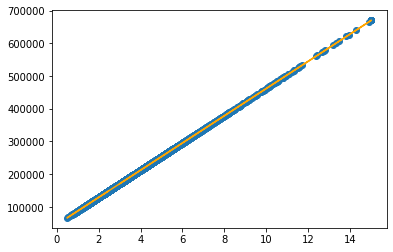

In [ ]:

import matplotlib.pyplot as plt

plt.scatter(x_test_med,y_test_med)
plt.plot(x_test_med,y_test_med,color = 'orange')
plt.show()